In [2]:
import pandas as pd
import math
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

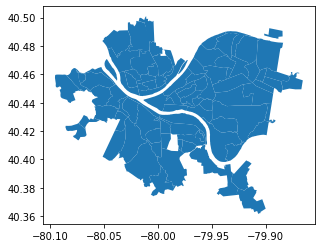

In [3]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


In [4]:
df = pd.read_csv("FireArms.csv")
df.head(5)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [5]:
df = df.dropna()
num_guns = df.groupby("neighborhood").sum()['shotgun_count']
num_guns.sort_values(ascending=False)

neighborhood
Homewood South         15
Marshall-Shadeland     13
Beechview              12
East Liberty            9
Carrick                 9
                       ..
Allegheny West          0
Lower Lawrenceville     0
Middle Hill             0
North Shore             0
Allegheny Center        0
Name: shotgun_count, Length: 88, dtype: int64

numpy.float64

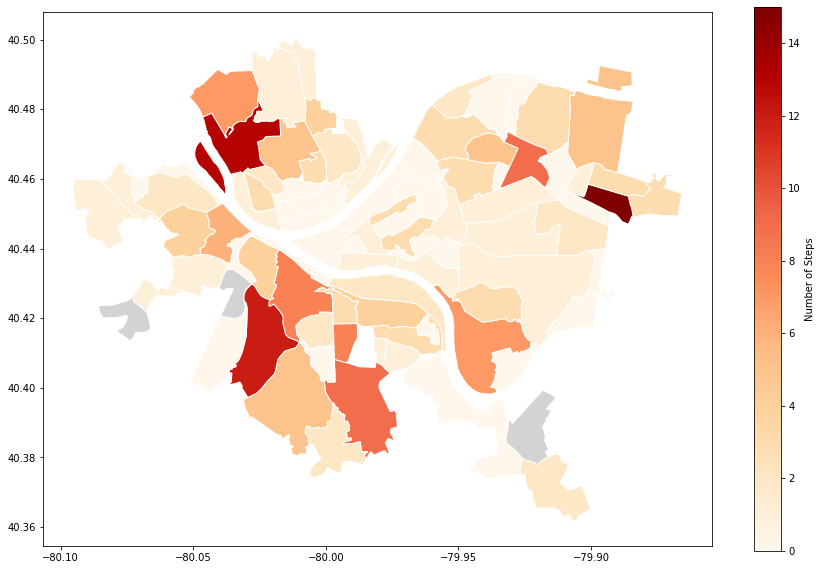

In [6]:
gun_map = neighborhoods.merge(num_guns, how='left', left_on='hood', right_on='neighborhood')
# draw a choropleth map using data from the column named "number_of_steps"
gun_map.plot(column='shotgun_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )
type(gun_map.shotgun_count[2])

In [7]:
df = pd.read_csv("signs.csv")
query_mask = df['description'] == 'Security Camera in Use'
df2 = df[query_mask]
df2 = df2.groupby("description")
newDict = {}
df2.head(100)
df3 = df2["neighborhood"].value_counts()
print(df3)
#df4 = neighborhoods.merge(df3.neighborhood, how='left', left_on='hood', right_on='neighborhood')


#df4.plot(column='neighborhood', # set the data to be used for coloring
 #              cmap='OrRd',              # choose a color palette
  #             edgecolor="white",        # outline the districts in white
   #            legend=True,              # show the legend
    #           legend_kwds={'label': "Number of Steps"}, # label the legend
     #          figsize=(15, 10),         # set the size
      #         missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
       #     )

description             neighborhood             
Security Camera in Use  Central Business District    4
                        Bluff                        2
                        Hazelwood                    2
                        Homewood North               2
                        Homewood South               2
                        Larimer                      2
                        Summer Hill                  2
                        Brighton Heights             1
                        Carrick                      1
                        Perry North                  1
                        Perry South                  1
                        Shadyside                    1
                        Strip District               1
Name: neighborhood, dtype: int64


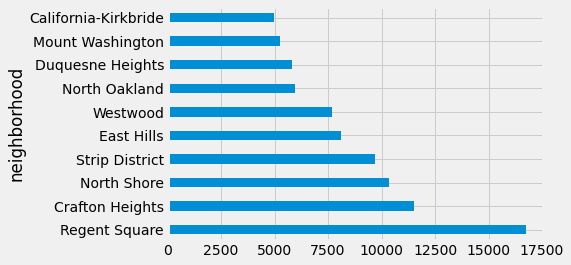

In [8]:
traffic = pd.read_csv("trafficCount.csv")
traffic.drop(labels = ["id", "device_id", "record_oid", "count_start_date", "count_end_date", "average_daily_bike_traffic",
                       "counter_number", "counter_type", "speed_limit", "max_speed", "median_speed", "percent_over_limit", 
                      "speed85_percent", "speed95_percent", "longitude", "latitude", "council_district", "ward", 
                      "tract", "public_works_division", "pli_division", "police_zone", "fire_zone"], inplace = True, axis = 1)
traffic = traffic.dropna()
trafficNums = traffic.groupby("neighborhood")["neighborhood"].value_counts()
num_traffic = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']
count = 0
for i in range(len(num_traffic)):
    num_traffic[i] = num_traffic[i]/trafficNums[i]
    
plt.style.use('fivethirtyeight')

num_traffic.sort_values(ascending=False)[:10].plot.barh(width = 0.4)



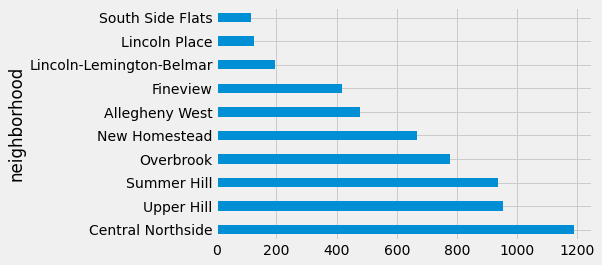

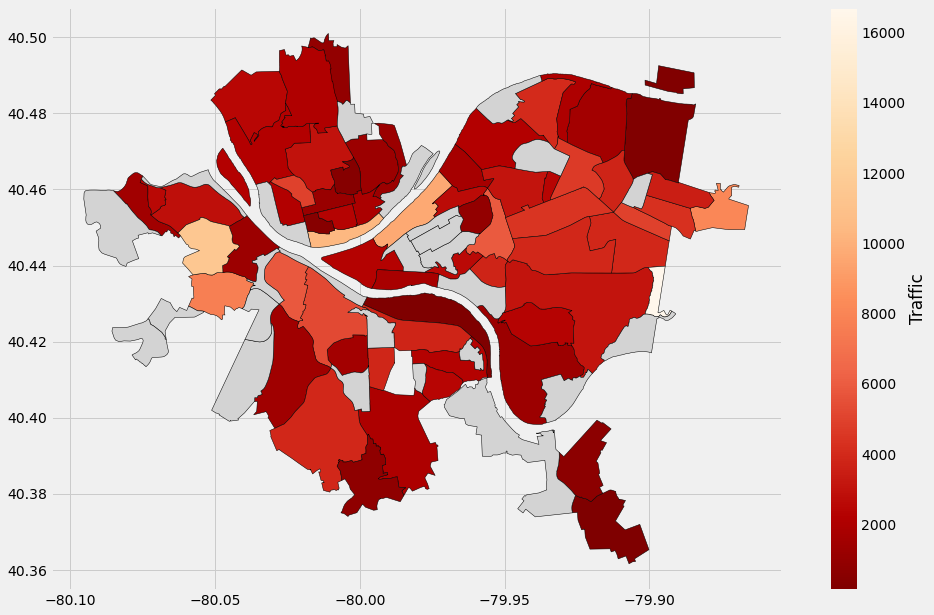

In [9]:

num_traffic.sort_values(ascending=False)[54:].plot.barh(width = 0.4)

traffic_map = neighborhoods.merge(num_traffic, how='left', left_on='hood', right_on='neighborhood')

traffic_map.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='OrRd_r',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )

In [10]:
police = pd.read_csv("police.csv", usecols = ["latitude", "longitude", "type", "name"])
police = police[police["type"]=="Police"][1:]
new_police_station = pd.DataFrame({"latitude": [40.44215], "longitude": [-80.03218], "type": ["Police"], "name": ["Police Zone 06"]})
police = police.append(new_police_station, ignore_index=True)
print(police)

                          name    type   latitude  longitude
0          Police Headquarters  Police  40.450594 -80.021420
1               Police Zone 01  Police  40.457007 -80.016092
2               Police Zone 02  Police  40.443584 -79.979972
3               Police Zone 03  Police  40.421670 -79.992496
4  Police Zone 04 Firehouse 18  Police  40.441413 -79.921139
5               Police Zone 05  Police  40.474208 -79.909148
6     Police Zone 2 Substation  Police  40.441812 -80.001663
7               Police Zone 06  Police  40.442150 -80.032180


<ipython-input-10-234646e8a1f3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  police = police.append(new_police_station, ignore_index=True)


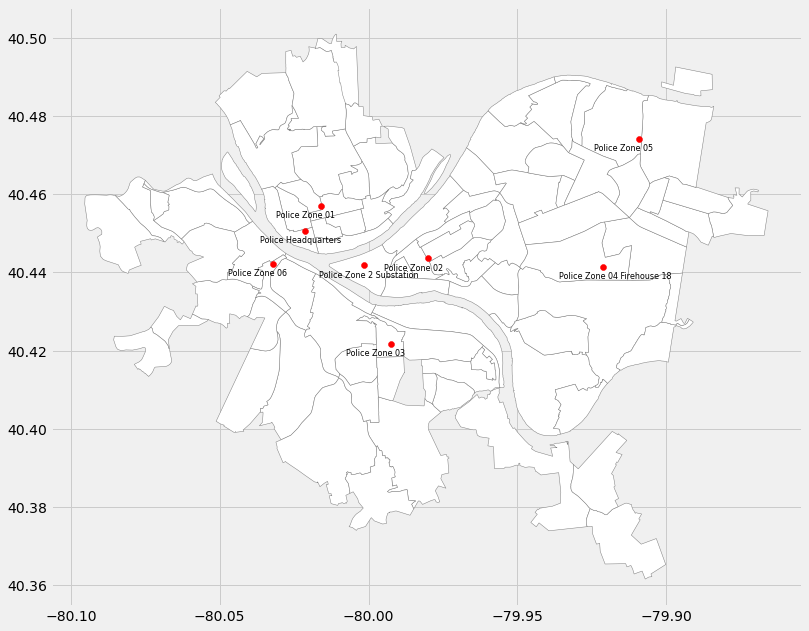

In [11]:
fig, ax = plt.subplots(figsize = (12, 12))
neighborhoods.plot(ax = ax, color = "white", edgecolor = "grey")
plt.scatter(x=police["longitude"], y=police["latitude"], color="red", marker="o")
for i, police_station in police.iterrows():
    plt.text(police_station["longitude"] -0.015, police_station["latitude"]-0.003, police_station["name"], fontsize=8)


In [12]:
def distance(lat1, lon1, lat2, lon2):
  # Convert latitude and longitude to spherical coordinates in radians.
  degrees_to_radians = math.pi/180.0

  # phi = 90 - latitude
  phi1 = (90.0 - lat1)*degrees_to_radians
  phi2 = (90.0 - lat2)*degrees_to_radians

  # theta = longitude
  theta1 = lon1*degrees_to_radians
  theta2 = lon2*degrees_to_radians

  # Compute spherical distance from spherical coordinates.
  cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + math.cos(phi1)*math.cos(phi2))
  arc = math.acos( cos )

  # Remember to multiply arc by the radius of the earth
  # in your favorite set of units to get length.
  return arc*3959
lat1 = 40.4406
lon1 = 79.9959
lat2 = 34.0522
lon2 = 118.2437

print(distance(lat1, lon1, lat2, lon2))


2132.2860960950393


<ipython-input-24-c4779e657092>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avgDis = avgDis.append(avgDis2, ignore_index=True)


           neighborhood  distance
0    Point Breeze North         1
1   Squirrel Hill North         1
2              Garfield         2
3     Bedford Dwellings         1
4             Knoxville         1
..                  ...       ...
84        Regent Square         1
85      Terrace Village         1
86              Elliott         1
87     South Side Flats         1
88             Fineview         1

[89 rows x 2 columns]


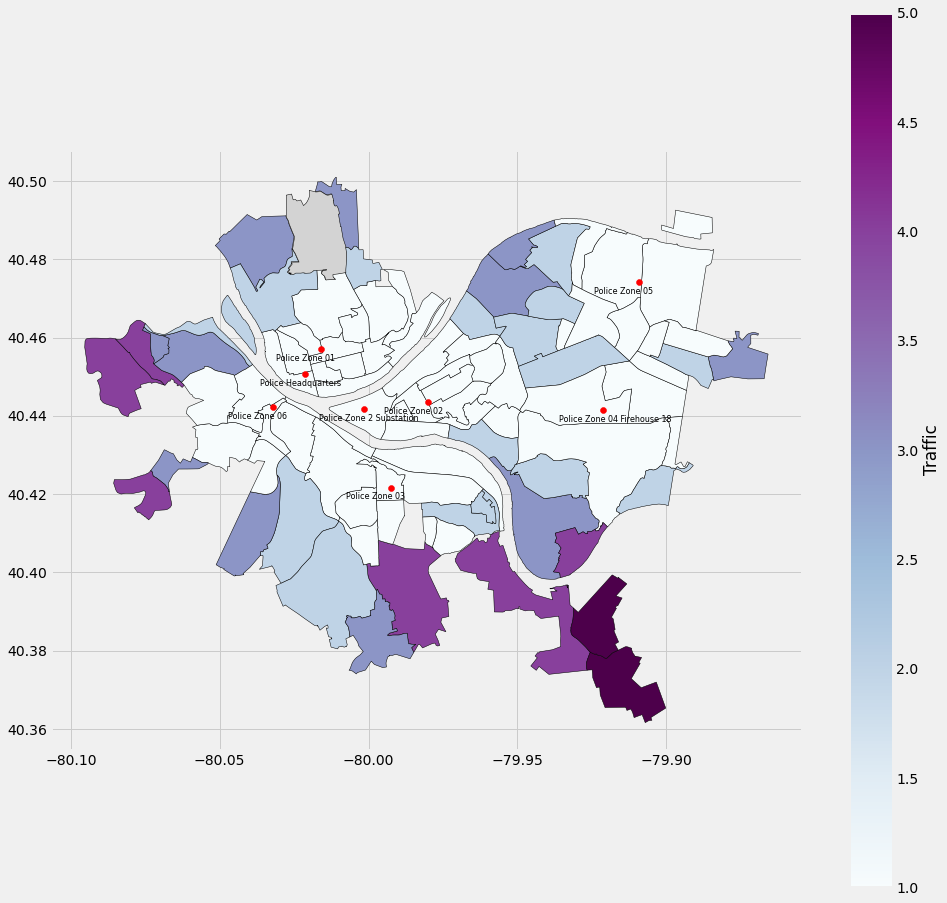

In [24]:
location = pd.read_csv("locations.csv", usecols = ["intptlat10", "intptlon10", "hood"])
avgDis = pd.DataFrame()



for index, rows in location.iterrows():
    totalDis = 0
    close = 0
    for index2, rows2 in police.iterrows():
        if rows.intptlat10 != 0 and rows.intptlon10 != " ":
            dis = distance(float(rows.intptlat10[1:]), float(rows.intptlon10), float(rows2.latitude), float(rows2.longitude))
            totalDis=totalDis+dis
            if dis < close or close ==0:
                close = dis
    if totalDis/8 != 0.0:
        
        if close < 1.5:
            avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [1]})
        elif close < 2:
            avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [2]})
        elif close < 2.5:
            avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [3]})
        elif close < 3:
            avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [4]})
        else:
            avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [5]})
                      


        #avgDis2 = pd.DataFrame({"neighborhood": [rows.hood], "distance": [totalDis/8]})
        avgDis = avgDis.append(avgDis2, ignore_index=True)
        #avgDis = avgDis.append(pd.DataFrame({"neighborhood": [rows.hood], "distance": [close]}), ignore_index=True)


print(avgDis)
        
dis_map = neighborhoods.merge(avgDis, how='left', left_on='hood', right_on='neighborhood')

fig, ax = plt.subplots(figsize = (15, 15))
dis_map.plot(ax = ax, column='distance', # set the data to be used for coloring
               cmap='BuPu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Traffic"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
                  )
plt.scatter(x=police["longitude"], y=police["latitude"], color="red", marker="o")
for i, police_station in police.iterrows():
    plt.text(police_station["longitude"] -0.015, police_station["latitude"]-0.003, police_station["name"], fontsize=8, color="black")